In [1]:
from sympy import*
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer = True)
f, g, h = symbols('f g h', cls = Function)
import math

In [33]:
def f(t, y):
    return y - t**2 + 1

In [34]:
def y(t):
    return (t + 1)**2 - 0.5*exp(t)

In [4]:
def Euler(startPoint, endPoint, numIntervals, initialCondition):
    stepSize = (endPoint - startPoint) / numIntervals
    tlist = [startPoint]
    wlist = [initialCondition]
    t = startPoint
    current_w = initialCondition
    
    for i in range (1, numIntervals + 1):
        current_w = current_w + stepSize * f(t, current_w)        
        t = startPoint + i * stepSize
        tlist.append(t)
        wlist.append(current_w)
    
    return tlist, wlist

In [5]:
def Heun2(startPoint, endPoint, numIntervals, initialCondition):
    stepSize = (endPoint - startPoint) / numIntervals
    tlist = [startPoint]
    wlist = [initialCondition]
    t = startPoint
    current_w = initialCondition
    
    for i in range (1, numIntervals + 1):
        k1 = f(t, current_w) #Euler's
        k2 = f(t + stepSize, current_w + stepSize * k1)
        slope = (k1 + k2) / 2
        current_w = current_w + stepSize * slope       
        t = startPoint + i * stepSize
        tlist.append(t)
        wlist.append(current_w)
    
    return tlist, wlist

In [16]:
def RK4(startPoint, endPoint, numIntervals, initialValue):
    stepSize = (endPoint - startPoint) / numIntervals
    tlist = [startPoint]
    wlist = [initialValue]
    t = startPoint
    current_w = initialValue
    
    for i in range (1, numIntervals + 1):
        k1 = stepSize * f(t, current_w) #Euler's
        k2 = stepSize * f(t + stepSize / 2, current_w + k1 / 2)
        k3 = stepSize * f(t + stepSize / 2, current_w + k2 / 2)
        k4 = stepSize * f(t + stepSize, current_w + k3)
        slope = (k1 + 2*k2 + 2*k3 + k4) / 6
        current_w = current_w + slope       
        t = startPoint + i * stepSize
        tlist.append(t)
        wlist.append(current_w)
    
    return tlist, wlist

In [17]:
tlist, wlist = Euler(0, 2, 10, 0.1)
ylist = []
error = []
length = len(tlist)
for i in range(0, length):
    ylist = ylist + [y(tlist[i])]
    error = error + [abs(y(tlist[i]) - wlist[i])]
     
#for i in range(0, 11):
 #   print ('t = %.1f, w = %.7f, y = %.7f, error = %.7f'%(tlist[i], wlist[i], ylist[i], error[i]))


tlist1, wlist1 = Heun2(0, 2, 10, 0.1)
ylist1 = []
error1 = []
length = len(tlist1)
for i in range(0, length):
    ylist1 = ylist1 + [y(tlist1[i])]
    error1 = error1 + [abs(y(tlist1[i]) - wlist1[i])]
    
tlist2, wlist2 = RK4(0, 2, 10, 0.1)
ylist2 = []
error2 = []
length = len(tlist2)
for i in range(0, length):
    ylist2 = ylist2 + [y(tlist2[i])]
    error2 = error2 + [abs(y(tlist2[i]) - wlist2[i])]
     
for i in range(0, 11):
    print ('t = %.1f, error_e = %.7f, error_w = %.7f, error_r = %.7f, true_y = %.7f'%(tlist[i], error[i], error1[i], error2[i], ylist[i]))

t = 0.0, error_e = 0.0000000, error_w = 0.0000000, error_r = 0.0000000, true_y = 0.1000000
t = 0.2, error_e = 0.0020201, error_w = 0.0000201, error_r = 0.0000000, true_y = 0.1020201
t = 0.4, error_e = 0.0043287, error_w = 0.0000455, error_r = 0.0000000, true_y = 0.1083287
t = 0.6, error_e = 0.0074017, error_w = 0.0000905, error_r = 0.0000000, true_y = 0.1197217
t = 0.8, error_e = 0.0119144, error_w = 0.0001847, error_r = 0.0000001, true_y = 0.1377128
t = 1.0, error_e = 0.0189460, error_w = 0.0003885, error_r = 0.0000005, true_y = 0.1648721
t = 1.2, error_e = 0.0303319, error_w = 0.0008257, error_r = 0.0000014, true_y = 0.2054433
t = 1.4, error_e = 0.0493075, error_w = 0.0017523, error_r = 0.0000042, true_y = 0.2664456
t = 1.6, error_e = 0.0817272, error_w = 0.0037043, error_r = 0.0000118, true_y = 0.3596640
t = 1.8, error_e = 0.1384325, error_w = 0.0078198, error_r = 0.0000317, true_y = 0.5053090
t = 2.0, error_e = 0.2399535, error_w = 0.0165513, error_r = 0.0000831, true_y = 0.7389056

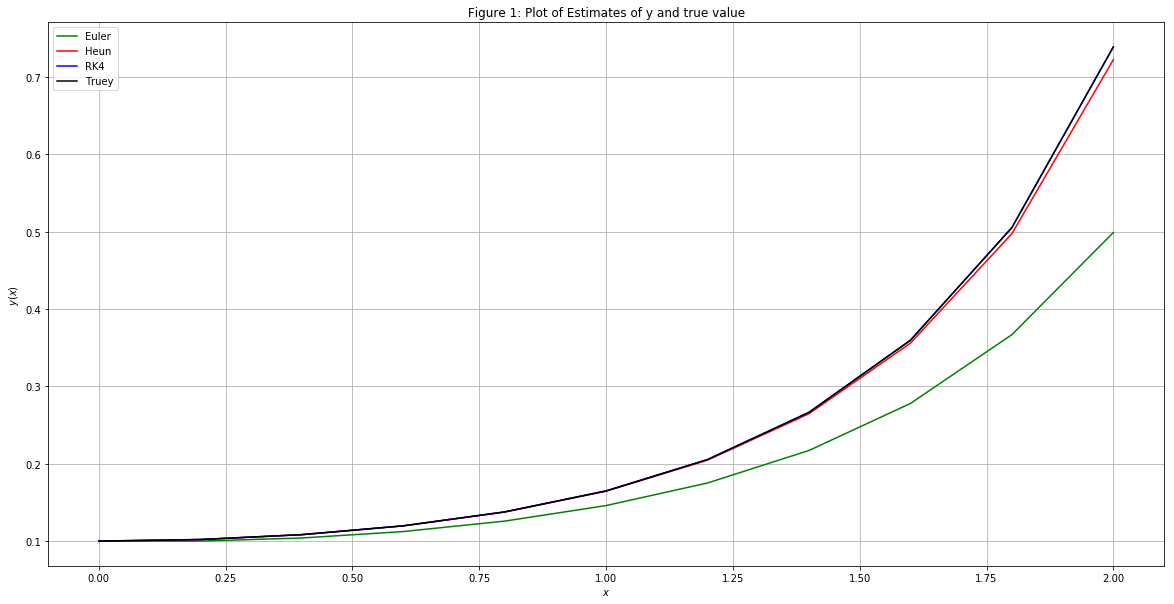

In [19]:
plt.figure(figsize=(20,10))
plt.plot(tlist,wlist, color = "g", label = "Euler")
plt.plot(tlist1,wlist1, color = "r", label = "Heun")
plt.plot(tlist2,wlist2, color = "b", label = "RK4")
plt.plot(tlist,ylist, color = "k", label = "Truey")
plt.plot()
plt.xlabel('$x$')
plt.ylabel('$y(x)$')
plt.title("Figure 1: Plot of Estimates of y and true value")
plt.legend()
plt.grid(True)
plt.show()

In [25]:
def RK4_改(startPoint, endPoint, numIntervals, initialValue, a, b, c, d): #modify RK4 a bit
    stepSize = (endPoint - startPoint) / numIntervals
    tlist = [startPoint]
    wlist = [initialValue]
    t = startPoint
    current_w = initialValue
    
    for i in range (1, numIntervals + 1):
        k1 = stepSize * f(t, current_w) #Euler's
        k2 = stepSize * f(t + stepSize / 2, current_w + k1 / 2)
        k3 = stepSize * f(t + stepSize / 2, current_w + k2 / 2)
        k4 = stepSize * f(t + stepSize, current_w + k3)
        slope = (a*k1 + b*k2 + c*k3 + d*k4) / (a + b + c + d)
        current_w = current_w + slope       
        t = startPoint + i * stepSize
        tlist.append(t)
        wlist.append(current_w)
    
    return tlist, wlist

In [26]:
def totalError(list1, list2):
    error = 0
    for i in range (0, len(list1)):
        error = error + abs(list1[i] - list2[i])
    return error        

In [36]:
for i1 in range(1,10):
    for i2 in range(1,10):
        for i3 in range(1,10):
            for i4 in range(1,10):
                tlist5, wlist5 = RK4_改(0, 2, 10, 0.5, i1, i2, i3, i4)
                error = totalError(wlist2, ylist)
                print("i1 = %d, i2 = %d, i3 = %d, i4 = %d, error = %.20f"%(i1, i2, i3, i4, error))

i1 = 1, i2 = 1, i3 = 1, i4 = 1, error = 0.00013288085315067699
i1 = 1, i2 = 1, i3 = 1, i4 = 2, error = 0.00013288085315067699
i1 = 1, i2 = 1, i3 = 1, i4 = 3, error = 0.00013288085315067699
i1 = 1, i2 = 1, i3 = 1, i4 = 4, error = 0.00013288085315067699
i1 = 1, i2 = 1, i3 = 1, i4 = 5, error = 0.00013288085315067699
i1 = 1, i2 = 1, i3 = 1, i4 = 6, error = 0.00013288085315067699
i1 = 1, i2 = 1, i3 = 1, i4 = 7, error = 0.00013288085315067699
i1 = 1, i2 = 1, i3 = 1, i4 = 8, error = 0.00013288085315067699
i1 = 1, i2 = 1, i3 = 1, i4 = 9, error = 0.00013288085315067699
i1 = 1, i2 = 1, i3 = 2, i4 = 1, error = 0.00013288085315067699
i1 = 1, i2 = 1, i3 = 2, i4 = 2, error = 0.00013288085315067699
i1 = 1, i2 = 1, i3 = 2, i4 = 3, error = 0.00013288085315067699
i1 = 1, i2 = 1, i3 = 2, i4 = 4, error = 0.00013288085315067699
i1 = 1, i2 = 1, i3 = 2, i4 = 5, error = 0.00013288085315067699
i1 = 1, i2 = 1, i3 = 2, i4 = 6, error = 0.00013288085315067699
i1 = 1, i2 = 1, i3 = 2, i4 = 7, error = 0.0001328808531

i1 = 1, i2 = 4, i3 = 6, i4 = 2, error = 0.00013288085315067699
i1 = 1, i2 = 4, i3 = 6, i4 = 3, error = 0.00013288085315067699
i1 = 1, i2 = 4, i3 = 6, i4 = 4, error = 0.00013288085315067699
i1 = 1, i2 = 4, i3 = 6, i4 = 5, error = 0.00013288085315067699
i1 = 1, i2 = 4, i3 = 6, i4 = 6, error = 0.00013288085315067699
i1 = 1, i2 = 4, i3 = 6, i4 = 7, error = 0.00013288085315067699
i1 = 1, i2 = 4, i3 = 6, i4 = 8, error = 0.00013288085315067699
i1 = 1, i2 = 4, i3 = 6, i4 = 9, error = 0.00013288085315067699
i1 = 1, i2 = 4, i3 = 7, i4 = 1, error = 0.00013288085315067699
i1 = 1, i2 = 4, i3 = 7, i4 = 2, error = 0.00013288085315067699
i1 = 1, i2 = 4, i3 = 7, i4 = 3, error = 0.00013288085315067699
i1 = 1, i2 = 4, i3 = 7, i4 = 4, error = 0.00013288085315067699
i1 = 1, i2 = 4, i3 = 7, i4 = 5, error = 0.00013288085315067699
i1 = 1, i2 = 4, i3 = 7, i4 = 6, error = 0.00013288085315067699
i1 = 1, i2 = 4, i3 = 7, i4 = 7, error = 0.00013288085315067699
i1 = 1, i2 = 4, i3 = 7, i4 = 8, error = 0.0001328808531

i1 = 1, i2 = 7, i3 = 4, i4 = 8, error = 0.00013288085315067699
i1 = 1, i2 = 7, i3 = 4, i4 = 9, error = 0.00013288085315067699
i1 = 1, i2 = 7, i3 = 5, i4 = 1, error = 0.00013288085315067699
i1 = 1, i2 = 7, i3 = 5, i4 = 2, error = 0.00013288085315067699
i1 = 1, i2 = 7, i3 = 5, i4 = 3, error = 0.00013288085315067699
i1 = 1, i2 = 7, i3 = 5, i4 = 4, error = 0.00013288085315067699
i1 = 1, i2 = 7, i3 = 5, i4 = 5, error = 0.00013288085315067699
i1 = 1, i2 = 7, i3 = 5, i4 = 6, error = 0.00013288085315067699
i1 = 1, i2 = 7, i3 = 5, i4 = 7, error = 0.00013288085315067699
i1 = 1, i2 = 7, i3 = 5, i4 = 8, error = 0.00013288085315067699
i1 = 1, i2 = 7, i3 = 5, i4 = 9, error = 0.00013288085315067699
i1 = 1, i2 = 7, i3 = 6, i4 = 1, error = 0.00013288085315067699
i1 = 1, i2 = 7, i3 = 6, i4 = 2, error = 0.00013288085315067699
i1 = 1, i2 = 7, i3 = 6, i4 = 3, error = 0.00013288085315067699
i1 = 1, i2 = 7, i3 = 6, i4 = 4, error = 0.00013288085315067699
i1 = 1, i2 = 7, i3 = 6, i4 = 5, error = 0.0001328808531

i1 = 1, i2 = 9, i3 = 9, i4 = 4, error = 0.00013288085315067699
i1 = 1, i2 = 9, i3 = 9, i4 = 5, error = 0.00013288085315067699
i1 = 1, i2 = 9, i3 = 9, i4 = 6, error = 0.00013288085315067699
i1 = 1, i2 = 9, i3 = 9, i4 = 7, error = 0.00013288085315067699
i1 = 1, i2 = 9, i3 = 9, i4 = 8, error = 0.00013288085315067699
i1 = 1, i2 = 9, i3 = 9, i4 = 9, error = 0.00013288085315067699
i1 = 2, i2 = 1, i3 = 1, i4 = 1, error = 0.00013288085315067699
i1 = 2, i2 = 1, i3 = 1, i4 = 2, error = 0.00013288085315067699
i1 = 2, i2 = 1, i3 = 1, i4 = 3, error = 0.00013288085315067699
i1 = 2, i2 = 1, i3 = 1, i4 = 4, error = 0.00013288085315067699
i1 = 2, i2 = 1, i3 = 1, i4 = 5, error = 0.00013288085315067699
i1 = 2, i2 = 1, i3 = 1, i4 = 6, error = 0.00013288085315067699
i1 = 2, i2 = 1, i3 = 1, i4 = 7, error = 0.00013288085315067699
i1 = 2, i2 = 1, i3 = 1, i4 = 8, error = 0.00013288085315067699
i1 = 2, i2 = 1, i3 = 1, i4 = 9, error = 0.00013288085315067699
i1 = 2, i2 = 1, i3 = 2, i4 = 1, error = 0.0001328808531

i1 = 2, i2 = 4, i3 = 2, i4 = 4, error = 0.00013288085315067699
i1 = 2, i2 = 4, i3 = 2, i4 = 5, error = 0.00013288085315067699
i1 = 2, i2 = 4, i3 = 2, i4 = 6, error = 0.00013288085315067699
i1 = 2, i2 = 4, i3 = 2, i4 = 7, error = 0.00013288085315067699
i1 = 2, i2 = 4, i3 = 2, i4 = 8, error = 0.00013288085315067699
i1 = 2, i2 = 4, i3 = 2, i4 = 9, error = 0.00013288085315067699
i1 = 2, i2 = 4, i3 = 3, i4 = 1, error = 0.00013288085315067699
i1 = 2, i2 = 4, i3 = 3, i4 = 2, error = 0.00013288085315067699
i1 = 2, i2 = 4, i3 = 3, i4 = 3, error = 0.00013288085315067699
i1 = 2, i2 = 4, i3 = 3, i4 = 4, error = 0.00013288085315067699
i1 = 2, i2 = 4, i3 = 3, i4 = 5, error = 0.00013288085315067699
i1 = 2, i2 = 4, i3 = 3, i4 = 6, error = 0.00013288085315067699
i1 = 2, i2 = 4, i3 = 3, i4 = 7, error = 0.00013288085315067699
i1 = 2, i2 = 4, i3 = 3, i4 = 8, error = 0.00013288085315067699
i1 = 2, i2 = 4, i3 = 3, i4 = 9, error = 0.00013288085315067699
i1 = 2, i2 = 4, i3 = 4, i4 = 1, error = 0.0001328808531

i1 = 2, i2 = 7, i3 = 9, i4 = 6, error = 0.00013288085315067699
i1 = 2, i2 = 7, i3 = 9, i4 = 7, error = 0.00013288085315067699
i1 = 2, i2 = 7, i3 = 9, i4 = 8, error = 0.00013288085315067699
i1 = 2, i2 = 7, i3 = 9, i4 = 9, error = 0.00013288085315067699
i1 = 2, i2 = 8, i3 = 1, i4 = 1, error = 0.00013288085315067699
i1 = 2, i2 = 8, i3 = 1, i4 = 2, error = 0.00013288085315067699
i1 = 2, i2 = 8, i3 = 1, i4 = 3, error = 0.00013288085315067699
i1 = 2, i2 = 8, i3 = 1, i4 = 4, error = 0.00013288085315067699
i1 = 2, i2 = 8, i3 = 1, i4 = 5, error = 0.00013288085315067699
i1 = 2, i2 = 8, i3 = 1, i4 = 6, error = 0.00013288085315067699
i1 = 2, i2 = 8, i3 = 1, i4 = 7, error = 0.00013288085315067699
i1 = 2, i2 = 8, i3 = 1, i4 = 8, error = 0.00013288085315067699
i1 = 2, i2 = 8, i3 = 1, i4 = 9, error = 0.00013288085315067699
i1 = 2, i2 = 8, i3 = 2, i4 = 1, error = 0.00013288085315067699
i1 = 2, i2 = 8, i3 = 2, i4 = 2, error = 0.00013288085315067699
i1 = 2, i2 = 8, i3 = 2, i4 = 3, error = 0.0001328808531

i1 = 3, i2 = 1, i3 = 3, i4 = 8, error = 0.00013288085315067699
i1 = 3, i2 = 1, i3 = 3, i4 = 9, error = 0.00013288085315067699
i1 = 3, i2 = 1, i3 = 4, i4 = 1, error = 0.00013288085315067699
i1 = 3, i2 = 1, i3 = 4, i4 = 2, error = 0.00013288085315067699
i1 = 3, i2 = 1, i3 = 4, i4 = 3, error = 0.00013288085315067699
i1 = 3, i2 = 1, i3 = 4, i4 = 4, error = 0.00013288085315067699
i1 = 3, i2 = 1, i3 = 4, i4 = 5, error = 0.00013288085315067699
i1 = 3, i2 = 1, i3 = 4, i4 = 6, error = 0.00013288085315067699
i1 = 3, i2 = 1, i3 = 4, i4 = 7, error = 0.00013288085315067699
i1 = 3, i2 = 1, i3 = 4, i4 = 8, error = 0.00013288085315067699
i1 = 3, i2 = 1, i3 = 4, i4 = 9, error = 0.00013288085315067699
i1 = 3, i2 = 1, i3 = 5, i4 = 1, error = 0.00013288085315067699
i1 = 3, i2 = 1, i3 = 5, i4 = 2, error = 0.00013288085315067699
i1 = 3, i2 = 1, i3 = 5, i4 = 3, error = 0.00013288085315067699
i1 = 3, i2 = 1, i3 = 5, i4 = 4, error = 0.00013288085315067699
i1 = 3, i2 = 1, i3 = 5, i4 = 5, error = 0.0001328808531

i1 = 3, i2 = 6, i3 = 2, i4 = 2, error = 0.00013288085315067699
i1 = 3, i2 = 6, i3 = 2, i4 = 3, error = 0.00013288085315067699
i1 = 3, i2 = 6, i3 = 2, i4 = 4, error = 0.00013288085315067699
i1 = 3, i2 = 6, i3 = 2, i4 = 5, error = 0.00013288085315067699
i1 = 3, i2 = 6, i3 = 2, i4 = 6, error = 0.00013288085315067699
i1 = 3, i2 = 6, i3 = 2, i4 = 7, error = 0.00013288085315067699
i1 = 3, i2 = 6, i3 = 2, i4 = 8, error = 0.00013288085315067699
i1 = 3, i2 = 6, i3 = 2, i4 = 9, error = 0.00013288085315067699
i1 = 3, i2 = 6, i3 = 3, i4 = 1, error = 0.00013288085315067699
i1 = 3, i2 = 6, i3 = 3, i4 = 2, error = 0.00013288085315067699
i1 = 3, i2 = 6, i3 = 3, i4 = 3, error = 0.00013288085315067699
i1 = 3, i2 = 6, i3 = 3, i4 = 4, error = 0.00013288085315067699
i1 = 3, i2 = 6, i3 = 3, i4 = 5, error = 0.00013288085315067699
i1 = 3, i2 = 6, i3 = 3, i4 = 6, error = 0.00013288085315067699
i1 = 3, i2 = 6, i3 = 3, i4 = 7, error = 0.00013288085315067699
i1 = 3, i2 = 6, i3 = 3, i4 = 8, error = 0.0001328808531

i1 = 4, i2 = 2, i3 = 1, i4 = 2, error = 0.00013288085315067699
i1 = 4, i2 = 2, i3 = 1, i4 = 3, error = 0.00013288085315067699
i1 = 4, i2 = 2, i3 = 1, i4 = 4, error = 0.00013288085315067699
i1 = 4, i2 = 2, i3 = 1, i4 = 5, error = 0.00013288085315067699
i1 = 4, i2 = 2, i3 = 1, i4 = 6, error = 0.00013288085315067699
i1 = 4, i2 = 2, i3 = 1, i4 = 7, error = 0.00013288085315067699
i1 = 4, i2 = 2, i3 = 1, i4 = 8, error = 0.00013288085315067699
i1 = 4, i2 = 2, i3 = 1, i4 = 9, error = 0.00013288085315067699
i1 = 4, i2 = 2, i3 = 2, i4 = 1, error = 0.00013288085315067699
i1 = 4, i2 = 2, i3 = 2, i4 = 2, error = 0.00013288085315067699
i1 = 4, i2 = 2, i3 = 2, i4 = 3, error = 0.00013288085315067699
i1 = 4, i2 = 2, i3 = 2, i4 = 4, error = 0.00013288085315067699
i1 = 4, i2 = 2, i3 = 2, i4 = 5, error = 0.00013288085315067699
i1 = 4, i2 = 2, i3 = 2, i4 = 6, error = 0.00013288085315067699
i1 = 4, i2 = 2, i3 = 2, i4 = 7, error = 0.00013288085315067699
i1 = 4, i2 = 2, i3 = 2, i4 = 8, error = 0.0001328808531

i1 = 4, i2 = 4, i3 = 6, i4 = 7, error = 0.00013288085315067699
i1 = 4, i2 = 4, i3 = 6, i4 = 8, error = 0.00013288085315067699
i1 = 4, i2 = 4, i3 = 6, i4 = 9, error = 0.00013288085315067699
i1 = 4, i2 = 4, i3 = 7, i4 = 1, error = 0.00013288085315067699
i1 = 4, i2 = 4, i3 = 7, i4 = 2, error = 0.00013288085315067699
i1 = 4, i2 = 4, i3 = 7, i4 = 3, error = 0.00013288085315067699
i1 = 4, i2 = 4, i3 = 7, i4 = 4, error = 0.00013288085315067699
i1 = 4, i2 = 4, i3 = 7, i4 = 5, error = 0.00013288085315067699
i1 = 4, i2 = 4, i3 = 7, i4 = 6, error = 0.00013288085315067699
i1 = 4, i2 = 4, i3 = 7, i4 = 7, error = 0.00013288085315067699
i1 = 4, i2 = 4, i3 = 7, i4 = 8, error = 0.00013288085315067699
i1 = 4, i2 = 4, i3 = 7, i4 = 9, error = 0.00013288085315067699
i1 = 4, i2 = 4, i3 = 8, i4 = 1, error = 0.00013288085315067699
i1 = 4, i2 = 4, i3 = 8, i4 = 2, error = 0.00013288085315067699
i1 = 4, i2 = 4, i3 = 8, i4 = 3, error = 0.00013288085315067699
i1 = 4, i2 = 4, i3 = 8, i4 = 4, error = 0.0001328808531

i1 = 4, i2 = 7, i3 = 6, i4 = 5, error = 0.00013288085315067699
i1 = 4, i2 = 7, i3 = 6, i4 = 6, error = 0.00013288085315067699
i1 = 4, i2 = 7, i3 = 6, i4 = 7, error = 0.00013288085315067699
i1 = 4, i2 = 7, i3 = 6, i4 = 8, error = 0.00013288085315067699
i1 = 4, i2 = 7, i3 = 6, i4 = 9, error = 0.00013288085315067699
i1 = 4, i2 = 7, i3 = 7, i4 = 1, error = 0.00013288085315067699
i1 = 4, i2 = 7, i3 = 7, i4 = 2, error = 0.00013288085315067699
i1 = 4, i2 = 7, i3 = 7, i4 = 3, error = 0.00013288085315067699
i1 = 4, i2 = 7, i3 = 7, i4 = 4, error = 0.00013288085315067699
i1 = 4, i2 = 7, i3 = 7, i4 = 5, error = 0.00013288085315067699
i1 = 4, i2 = 7, i3 = 7, i4 = 6, error = 0.00013288085315067699
i1 = 4, i2 = 7, i3 = 7, i4 = 7, error = 0.00013288085315067699
i1 = 4, i2 = 7, i3 = 7, i4 = 8, error = 0.00013288085315067699
i1 = 4, i2 = 7, i3 = 7, i4 = 9, error = 0.00013288085315067699
i1 = 4, i2 = 7, i3 = 8, i4 = 1, error = 0.00013288085315067699
i1 = 4, i2 = 7, i3 = 8, i4 = 2, error = 0.0001328808531

i1 = 5, i2 = 1, i3 = 3, i4 = 9, error = 0.00013288085315067699
i1 = 5, i2 = 1, i3 = 4, i4 = 1, error = 0.00013288085315067699
i1 = 5, i2 = 1, i3 = 4, i4 = 2, error = 0.00013288085315067699
i1 = 5, i2 = 1, i3 = 4, i4 = 3, error = 0.00013288085315067699
i1 = 5, i2 = 1, i3 = 4, i4 = 4, error = 0.00013288085315067699
i1 = 5, i2 = 1, i3 = 4, i4 = 5, error = 0.00013288085315067699
i1 = 5, i2 = 1, i3 = 4, i4 = 6, error = 0.00013288085315067699
i1 = 5, i2 = 1, i3 = 4, i4 = 7, error = 0.00013288085315067699
i1 = 5, i2 = 1, i3 = 4, i4 = 8, error = 0.00013288085315067699
i1 = 5, i2 = 1, i3 = 4, i4 = 9, error = 0.00013288085315067699
i1 = 5, i2 = 1, i3 = 5, i4 = 1, error = 0.00013288085315067699
i1 = 5, i2 = 1, i3 = 5, i4 = 2, error = 0.00013288085315067699
i1 = 5, i2 = 1, i3 = 5, i4 = 3, error = 0.00013288085315067699
i1 = 5, i2 = 1, i3 = 5, i4 = 4, error = 0.00013288085315067699
i1 = 5, i2 = 1, i3 = 5, i4 = 5, error = 0.00013288085315067699
i1 = 5, i2 = 1, i3 = 5, i4 = 6, error = 0.0001328808531

i1 = 5, i2 = 3, i3 = 5, i4 = 2, error = 0.00013288085315067699
i1 = 5, i2 = 3, i3 = 5, i4 = 3, error = 0.00013288085315067699
i1 = 5, i2 = 3, i3 = 5, i4 = 4, error = 0.00013288085315067699
i1 = 5, i2 = 3, i3 = 5, i4 = 5, error = 0.00013288085315067699
i1 = 5, i2 = 3, i3 = 5, i4 = 6, error = 0.00013288085315067699
i1 = 5, i2 = 3, i3 = 5, i4 = 7, error = 0.00013288085315067699
i1 = 5, i2 = 3, i3 = 5, i4 = 8, error = 0.00013288085315067699
i1 = 5, i2 = 3, i3 = 5, i4 = 9, error = 0.00013288085315067699
i1 = 5, i2 = 3, i3 = 6, i4 = 1, error = 0.00013288085315067699
i1 = 5, i2 = 3, i3 = 6, i4 = 2, error = 0.00013288085315067699
i1 = 5, i2 = 3, i3 = 6, i4 = 3, error = 0.00013288085315067699
i1 = 5, i2 = 3, i3 = 6, i4 = 4, error = 0.00013288085315067699
i1 = 5, i2 = 3, i3 = 6, i4 = 5, error = 0.00013288085315067699
i1 = 5, i2 = 3, i3 = 6, i4 = 6, error = 0.00013288085315067699
i1 = 5, i2 = 3, i3 = 6, i4 = 7, error = 0.00013288085315067699
i1 = 5, i2 = 3, i3 = 6, i4 = 8, error = 0.0001328808531

i1 = 5, i2 = 6, i3 = 5, i4 = 9, error = 0.00013288085315067699
i1 = 5, i2 = 6, i3 = 6, i4 = 1, error = 0.00013288085315067699
i1 = 5, i2 = 6, i3 = 6, i4 = 2, error = 0.00013288085315067699
i1 = 5, i2 = 6, i3 = 6, i4 = 3, error = 0.00013288085315067699
i1 = 5, i2 = 6, i3 = 6, i4 = 4, error = 0.00013288085315067699
i1 = 5, i2 = 6, i3 = 6, i4 = 5, error = 0.00013288085315067699
i1 = 5, i2 = 6, i3 = 6, i4 = 6, error = 0.00013288085315067699
i1 = 5, i2 = 6, i3 = 6, i4 = 7, error = 0.00013288085315067699
i1 = 5, i2 = 6, i3 = 6, i4 = 8, error = 0.00013288085315067699
i1 = 5, i2 = 6, i3 = 6, i4 = 9, error = 0.00013288085315067699
i1 = 5, i2 = 6, i3 = 7, i4 = 1, error = 0.00013288085315067699
i1 = 5, i2 = 6, i3 = 7, i4 = 2, error = 0.00013288085315067699
i1 = 5, i2 = 6, i3 = 7, i4 = 3, error = 0.00013288085315067699
i1 = 5, i2 = 6, i3 = 7, i4 = 4, error = 0.00013288085315067699
i1 = 5, i2 = 6, i3 = 7, i4 = 5, error = 0.00013288085315067699
i1 = 5, i2 = 6, i3 = 7, i4 = 6, error = 0.0001328808531

i1 = 5, i2 = 8, i3 = 4, i4 = 1, error = 0.00013288085315067699
i1 = 5, i2 = 8, i3 = 4, i4 = 2, error = 0.00013288085315067699
i1 = 5, i2 = 8, i3 = 4, i4 = 3, error = 0.00013288085315067699
i1 = 5, i2 = 8, i3 = 4, i4 = 4, error = 0.00013288085315067699
i1 = 5, i2 = 8, i3 = 4, i4 = 5, error = 0.00013288085315067699
i1 = 5, i2 = 8, i3 = 4, i4 = 6, error = 0.00013288085315067699
i1 = 5, i2 = 8, i3 = 4, i4 = 7, error = 0.00013288085315067699
i1 = 5, i2 = 8, i3 = 4, i4 = 8, error = 0.00013288085315067699
i1 = 5, i2 = 8, i3 = 4, i4 = 9, error = 0.00013288085315067699
i1 = 5, i2 = 8, i3 = 5, i4 = 1, error = 0.00013288085315067699
i1 = 5, i2 = 8, i3 = 5, i4 = 2, error = 0.00013288085315067699
i1 = 5, i2 = 8, i3 = 5, i4 = 3, error = 0.00013288085315067699
i1 = 5, i2 = 8, i3 = 5, i4 = 4, error = 0.00013288085315067699
i1 = 5, i2 = 8, i3 = 5, i4 = 5, error = 0.00013288085315067699
i1 = 5, i2 = 8, i3 = 5, i4 = 6, error = 0.00013288085315067699
i1 = 5, i2 = 8, i3 = 5, i4 = 7, error = 0.0001328808531

i1 = 6, i2 = 2, i3 = 7, i4 = 3, error = 0.00013288085315067699
i1 = 6, i2 = 2, i3 = 7, i4 = 4, error = 0.00013288085315067699
i1 = 6, i2 = 2, i3 = 7, i4 = 5, error = 0.00013288085315067699
i1 = 6, i2 = 2, i3 = 7, i4 = 6, error = 0.00013288085315067699
i1 = 6, i2 = 2, i3 = 7, i4 = 7, error = 0.00013288085315067699
i1 = 6, i2 = 2, i3 = 7, i4 = 8, error = 0.00013288085315067699
i1 = 6, i2 = 2, i3 = 7, i4 = 9, error = 0.00013288085315067699
i1 = 6, i2 = 2, i3 = 8, i4 = 1, error = 0.00013288085315067699
i1 = 6, i2 = 2, i3 = 8, i4 = 2, error = 0.00013288085315067699
i1 = 6, i2 = 2, i3 = 8, i4 = 3, error = 0.00013288085315067699
i1 = 6, i2 = 2, i3 = 8, i4 = 4, error = 0.00013288085315067699
i1 = 6, i2 = 2, i3 = 8, i4 = 5, error = 0.00013288085315067699
i1 = 6, i2 = 2, i3 = 8, i4 = 6, error = 0.00013288085315067699
i1 = 6, i2 = 2, i3 = 8, i4 = 7, error = 0.00013288085315067699
i1 = 6, i2 = 2, i3 = 8, i4 = 8, error = 0.00013288085315067699
i1 = 6, i2 = 2, i3 = 8, i4 = 9, error = 0.0001328808531

i1 = 6, i2 = 5, i3 = 2, i4 = 1, error = 0.00013288085315067699
i1 = 6, i2 = 5, i3 = 2, i4 = 2, error = 0.00013288085315067699
i1 = 6, i2 = 5, i3 = 2, i4 = 3, error = 0.00013288085315067699
i1 = 6, i2 = 5, i3 = 2, i4 = 4, error = 0.00013288085315067699
i1 = 6, i2 = 5, i3 = 2, i4 = 5, error = 0.00013288085315067699
i1 = 6, i2 = 5, i3 = 2, i4 = 6, error = 0.00013288085315067699
i1 = 6, i2 = 5, i3 = 2, i4 = 7, error = 0.00013288085315067699
i1 = 6, i2 = 5, i3 = 2, i4 = 8, error = 0.00013288085315067699
i1 = 6, i2 = 5, i3 = 2, i4 = 9, error = 0.00013288085315067699
i1 = 6, i2 = 5, i3 = 3, i4 = 1, error = 0.00013288085315067699
i1 = 6, i2 = 5, i3 = 3, i4 = 2, error = 0.00013288085315067699
i1 = 6, i2 = 5, i3 = 3, i4 = 3, error = 0.00013288085315067699
i1 = 6, i2 = 5, i3 = 3, i4 = 4, error = 0.00013288085315067699
i1 = 6, i2 = 5, i3 = 3, i4 = 5, error = 0.00013288085315067699
i1 = 6, i2 = 5, i3 = 3, i4 = 6, error = 0.00013288085315067699
i1 = 6, i2 = 5, i3 = 3, i4 = 7, error = 0.0001328808531

i1 = 6, i2 = 8, i3 = 1, i4 = 1, error = 0.00013288085315067699
i1 = 6, i2 = 8, i3 = 1, i4 = 2, error = 0.00013288085315067699
i1 = 6, i2 = 8, i3 = 1, i4 = 3, error = 0.00013288085315067699
i1 = 6, i2 = 8, i3 = 1, i4 = 4, error = 0.00013288085315067699
i1 = 6, i2 = 8, i3 = 1, i4 = 5, error = 0.00013288085315067699
i1 = 6, i2 = 8, i3 = 1, i4 = 6, error = 0.00013288085315067699
i1 = 6, i2 = 8, i3 = 1, i4 = 7, error = 0.00013288085315067699
i1 = 6, i2 = 8, i3 = 1, i4 = 8, error = 0.00013288085315067699
i1 = 6, i2 = 8, i3 = 1, i4 = 9, error = 0.00013288085315067699
i1 = 6, i2 = 8, i3 = 2, i4 = 1, error = 0.00013288085315067699
i1 = 6, i2 = 8, i3 = 2, i4 = 2, error = 0.00013288085315067699
i1 = 6, i2 = 8, i3 = 2, i4 = 3, error = 0.00013288085315067699
i1 = 6, i2 = 8, i3 = 2, i4 = 4, error = 0.00013288085315067699
i1 = 6, i2 = 8, i3 = 2, i4 = 5, error = 0.00013288085315067699
i1 = 6, i2 = 8, i3 = 2, i4 = 6, error = 0.00013288085315067699
i1 = 6, i2 = 8, i3 = 2, i4 = 7, error = 0.0001328808531

i1 = 7, i2 = 2, i3 = 1, i4 = 5, error = 0.00013288085315067699
i1 = 7, i2 = 2, i3 = 1, i4 = 6, error = 0.00013288085315067699
i1 = 7, i2 = 2, i3 = 1, i4 = 7, error = 0.00013288085315067699
i1 = 7, i2 = 2, i3 = 1, i4 = 8, error = 0.00013288085315067699
i1 = 7, i2 = 2, i3 = 1, i4 = 9, error = 0.00013288085315067699
i1 = 7, i2 = 2, i3 = 2, i4 = 1, error = 0.00013288085315067699
i1 = 7, i2 = 2, i3 = 2, i4 = 2, error = 0.00013288085315067699
i1 = 7, i2 = 2, i3 = 2, i4 = 3, error = 0.00013288085315067699
i1 = 7, i2 = 2, i3 = 2, i4 = 4, error = 0.00013288085315067699
i1 = 7, i2 = 2, i3 = 2, i4 = 5, error = 0.00013288085315067699
i1 = 7, i2 = 2, i3 = 2, i4 = 6, error = 0.00013288085315067699
i1 = 7, i2 = 2, i3 = 2, i4 = 7, error = 0.00013288085315067699
i1 = 7, i2 = 2, i3 = 2, i4 = 8, error = 0.00013288085315067699
i1 = 7, i2 = 2, i3 = 2, i4 = 9, error = 0.00013288085315067699
i1 = 7, i2 = 2, i3 = 3, i4 = 1, error = 0.00013288085315067699
i1 = 7, i2 = 2, i3 = 3, i4 = 2, error = 0.0001328808531

i1 = 7, i2 = 7, i3 = 2, i4 = 3, error = 0.00013288085315067699
i1 = 7, i2 = 7, i3 = 2, i4 = 4, error = 0.00013288085315067699
i1 = 7, i2 = 7, i3 = 2, i4 = 5, error = 0.00013288085315067699
i1 = 7, i2 = 7, i3 = 2, i4 = 6, error = 0.00013288085315067699
i1 = 7, i2 = 7, i3 = 2, i4 = 7, error = 0.00013288085315067699
i1 = 7, i2 = 7, i3 = 2, i4 = 8, error = 0.00013288085315067699
i1 = 7, i2 = 7, i3 = 2, i4 = 9, error = 0.00013288085315067699
i1 = 7, i2 = 7, i3 = 3, i4 = 1, error = 0.00013288085315067699
i1 = 7, i2 = 7, i3 = 3, i4 = 2, error = 0.00013288085315067699
i1 = 7, i2 = 7, i3 = 3, i4 = 3, error = 0.00013288085315067699
i1 = 7, i2 = 7, i3 = 3, i4 = 4, error = 0.00013288085315067699
i1 = 7, i2 = 7, i3 = 3, i4 = 5, error = 0.00013288085315067699
i1 = 7, i2 = 7, i3 = 3, i4 = 6, error = 0.00013288085315067699
i1 = 7, i2 = 7, i3 = 3, i4 = 7, error = 0.00013288085315067699
i1 = 7, i2 = 7, i3 = 3, i4 = 8, error = 0.00013288085315067699
i1 = 7, i2 = 7, i3 = 3, i4 = 9, error = 0.0001328808531

i1 = 8, i2 = 3, i3 = 3, i4 = 3, error = 0.00013288085315067699
i1 = 8, i2 = 3, i3 = 3, i4 = 4, error = 0.00013288085315067699
i1 = 8, i2 = 3, i3 = 3, i4 = 5, error = 0.00013288085315067699
i1 = 8, i2 = 3, i3 = 3, i4 = 6, error = 0.00013288085315067699
i1 = 8, i2 = 3, i3 = 3, i4 = 7, error = 0.00013288085315067699
i1 = 8, i2 = 3, i3 = 3, i4 = 8, error = 0.00013288085315067699
i1 = 8, i2 = 3, i3 = 3, i4 = 9, error = 0.00013288085315067699
i1 = 8, i2 = 3, i3 = 4, i4 = 1, error = 0.00013288085315067699
i1 = 8, i2 = 3, i3 = 4, i4 = 2, error = 0.00013288085315067699
i1 = 8, i2 = 3, i3 = 4, i4 = 3, error = 0.00013288085315067699
i1 = 8, i2 = 3, i3 = 4, i4 = 4, error = 0.00013288085315067699
i1 = 8, i2 = 3, i3 = 4, i4 = 5, error = 0.00013288085315067699
i1 = 8, i2 = 3, i3 = 4, i4 = 6, error = 0.00013288085315067699
i1 = 8, i2 = 3, i3 = 4, i4 = 7, error = 0.00013288085315067699
i1 = 8, i2 = 3, i3 = 4, i4 = 8, error = 0.00013288085315067699
i1 = 8, i2 = 3, i3 = 4, i4 = 9, error = 0.0001328808531

i1 = 8, i2 = 5, i3 = 6, i4 = 3, error = 0.00013288085315067699
i1 = 8, i2 = 5, i3 = 6, i4 = 4, error = 0.00013288085315067699
i1 = 8, i2 = 5, i3 = 6, i4 = 5, error = 0.00013288085315067699
i1 = 8, i2 = 5, i3 = 6, i4 = 6, error = 0.00013288085315067699
i1 = 8, i2 = 5, i3 = 6, i4 = 7, error = 0.00013288085315067699
i1 = 8, i2 = 5, i3 = 6, i4 = 8, error = 0.00013288085315067699
i1 = 8, i2 = 5, i3 = 6, i4 = 9, error = 0.00013288085315067699
i1 = 8, i2 = 5, i3 = 7, i4 = 1, error = 0.00013288085315067699
i1 = 8, i2 = 5, i3 = 7, i4 = 2, error = 0.00013288085315067699
i1 = 8, i2 = 5, i3 = 7, i4 = 3, error = 0.00013288085315067699
i1 = 8, i2 = 5, i3 = 7, i4 = 4, error = 0.00013288085315067699
i1 = 8, i2 = 5, i3 = 7, i4 = 5, error = 0.00013288085315067699
i1 = 8, i2 = 5, i3 = 7, i4 = 6, error = 0.00013288085315067699
i1 = 8, i2 = 5, i3 = 7, i4 = 7, error = 0.00013288085315067699
i1 = 8, i2 = 5, i3 = 7, i4 = 8, error = 0.00013288085315067699
i1 = 8, i2 = 5, i3 = 7, i4 = 9, error = 0.0001328808531

i1 = 8, i2 = 8, i3 = 7, i4 = 9, error = 0.00013288085315067699
i1 = 8, i2 = 8, i3 = 8, i4 = 1, error = 0.00013288085315067699
i1 = 8, i2 = 8, i3 = 8, i4 = 2, error = 0.00013288085315067699
i1 = 8, i2 = 8, i3 = 8, i4 = 3, error = 0.00013288085315067699
i1 = 8, i2 = 8, i3 = 8, i4 = 4, error = 0.00013288085315067699
i1 = 8, i2 = 8, i3 = 8, i4 = 5, error = 0.00013288085315067699
i1 = 8, i2 = 8, i3 = 8, i4 = 6, error = 0.00013288085315067699
i1 = 8, i2 = 8, i3 = 8, i4 = 7, error = 0.00013288085315067699
i1 = 8, i2 = 8, i3 = 8, i4 = 8, error = 0.00013288085315067699
i1 = 8, i2 = 8, i3 = 8, i4 = 9, error = 0.00013288085315067699
i1 = 8, i2 = 8, i3 = 9, i4 = 1, error = 0.00013288085315067699
i1 = 8, i2 = 8, i3 = 9, i4 = 2, error = 0.00013288085315067699
i1 = 8, i2 = 8, i3 = 9, i4 = 3, error = 0.00013288085315067699
i1 = 8, i2 = 8, i3 = 9, i4 = 4, error = 0.00013288085315067699
i1 = 8, i2 = 8, i3 = 9, i4 = 5, error = 0.00013288085315067699
i1 = 8, i2 = 8, i3 = 9, i4 = 6, error = 0.0001328808531

i1 = 9, i2 = 2, i3 = 7, i4 = 7, error = 0.00013288085315067699
i1 = 9, i2 = 2, i3 = 7, i4 = 8, error = 0.00013288085315067699
i1 = 9, i2 = 2, i3 = 7, i4 = 9, error = 0.00013288085315067699
i1 = 9, i2 = 2, i3 = 8, i4 = 1, error = 0.00013288085315067699
i1 = 9, i2 = 2, i3 = 8, i4 = 2, error = 0.00013288085315067699
i1 = 9, i2 = 2, i3 = 8, i4 = 3, error = 0.00013288085315067699
i1 = 9, i2 = 2, i3 = 8, i4 = 4, error = 0.00013288085315067699
i1 = 9, i2 = 2, i3 = 8, i4 = 5, error = 0.00013288085315067699
i1 = 9, i2 = 2, i3 = 8, i4 = 6, error = 0.00013288085315067699
i1 = 9, i2 = 2, i3 = 8, i4 = 7, error = 0.00013288085315067699
i1 = 9, i2 = 2, i3 = 8, i4 = 8, error = 0.00013288085315067699
i1 = 9, i2 = 2, i3 = 8, i4 = 9, error = 0.00013288085315067699
i1 = 9, i2 = 2, i3 = 9, i4 = 1, error = 0.00013288085315067699
i1 = 9, i2 = 2, i3 = 9, i4 = 2, error = 0.00013288085315067699
i1 = 9, i2 = 2, i3 = 9, i4 = 3, error = 0.00013288085315067699
i1 = 9, i2 = 2, i3 = 9, i4 = 4, error = 0.0001328808531

i1 = 9, i2 = 5, i3 = 7, i4 = 6, error = 0.00013288085315067699
i1 = 9, i2 = 5, i3 = 7, i4 = 7, error = 0.00013288085315067699
i1 = 9, i2 = 5, i3 = 7, i4 = 8, error = 0.00013288085315067699
i1 = 9, i2 = 5, i3 = 7, i4 = 9, error = 0.00013288085315067699
i1 = 9, i2 = 5, i3 = 8, i4 = 1, error = 0.00013288085315067699
i1 = 9, i2 = 5, i3 = 8, i4 = 2, error = 0.00013288085315067699
i1 = 9, i2 = 5, i3 = 8, i4 = 3, error = 0.00013288085315067699
i1 = 9, i2 = 5, i3 = 8, i4 = 4, error = 0.00013288085315067699
i1 = 9, i2 = 5, i3 = 8, i4 = 5, error = 0.00013288085315067699
i1 = 9, i2 = 5, i3 = 8, i4 = 6, error = 0.00013288085315067699
i1 = 9, i2 = 5, i3 = 8, i4 = 7, error = 0.00013288085315067699
i1 = 9, i2 = 5, i3 = 8, i4 = 8, error = 0.00013288085315067699
i1 = 9, i2 = 5, i3 = 8, i4 = 9, error = 0.00013288085315067699
i1 = 9, i2 = 5, i3 = 9, i4 = 1, error = 0.00013288085315067699
i1 = 9, i2 = 5, i3 = 9, i4 = 2, error = 0.00013288085315067699
i1 = 9, i2 = 5, i3 = 9, i4 = 3, error = 0.0001328808531

i1 = 9, i2 = 8, i3 = 9, i4 = 2, error = 0.00013288085315067699
i1 = 9, i2 = 8, i3 = 9, i4 = 3, error = 0.00013288085315067699
i1 = 9, i2 = 8, i3 = 9, i4 = 4, error = 0.00013288085315067699
i1 = 9, i2 = 8, i3 = 9, i4 = 5, error = 0.00013288085315067699
i1 = 9, i2 = 8, i3 = 9, i4 = 6, error = 0.00013288085315067699
i1 = 9, i2 = 8, i3 = 9, i4 = 7, error = 0.00013288085315067699
i1 = 9, i2 = 8, i3 = 9, i4 = 8, error = 0.00013288085315067699
i1 = 9, i2 = 8, i3 = 9, i4 = 9, error = 0.00013288085315067699
i1 = 9, i2 = 9, i3 = 1, i4 = 1, error = 0.00013288085315067699
i1 = 9, i2 = 9, i3 = 1, i4 = 2, error = 0.00013288085315067699
i1 = 9, i2 = 9, i3 = 1, i4 = 3, error = 0.00013288085315067699
i1 = 9, i2 = 9, i3 = 1, i4 = 4, error = 0.00013288085315067699
i1 = 9, i2 = 9, i3 = 1, i4 = 5, error = 0.00013288085315067699
i1 = 9, i2 = 9, i3 = 1, i4 = 6, error = 0.00013288085315067699
i1 = 9, i2 = 9, i3 = 1, i4 = 7, error = 0.00013288085315067699
i1 = 9, i2 = 9, i3 = 1, i4 = 8, error = 0.0001328808531